## Volatility Modeling: Time Series Analysis With ARCH Package

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

import yfinance as yfin
yfin.pdr_override()

from arch import arch_model



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-05-06  49.799999  50.330002  48.740002  49.799999  39.651794  8247366
2021-05-07  50.060001  50.180000  49.709999  50.090000  39.882702  6470924
2021-05-10  50.500000  51.820000  50.500000  51.650002  41.124809  5967899
2021-05-11  51.740002  51.799999  50.849998  51.279999  40.830200  5468836
2021-05-12  51.279999  51.430000  50.590000  51.000000  40.607258  4035498


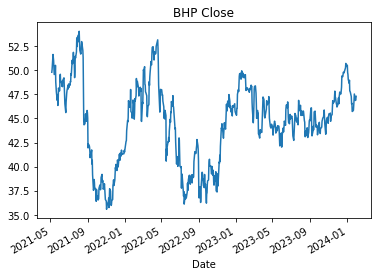

In [3]:
#Setting some arbitrary time period

end = dt.datetime.now()
start =end - dt.timedelta(days=1000)

# Importing some stock data
df = pdr.get_data_yahoo('BHP.AX', start, end)

print(df.head())

#plot
adjusted_close = df['Close']
adjusted_close.plot()
plt.title('BHP Close')
plt.show()

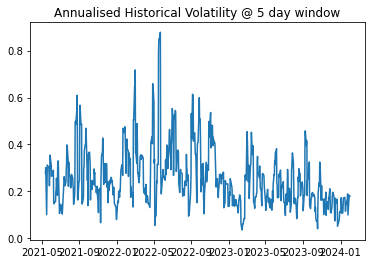

In [39]:
returns = df['Close'].pct_change().dropna()

# Log returns
lnReturns = np.log(df['Close']/df['Close'].shift(1))

# Trading Days
tdays = 252

# Window Size
window = 5


#Calculate Volatility
vol= df['Close'].pct_change().rolling(window).std()*(tdays**0.5)

plt.plot(vol)
plt.title('Annualised Historical Volatility @ 5 day window')
plt.show()

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

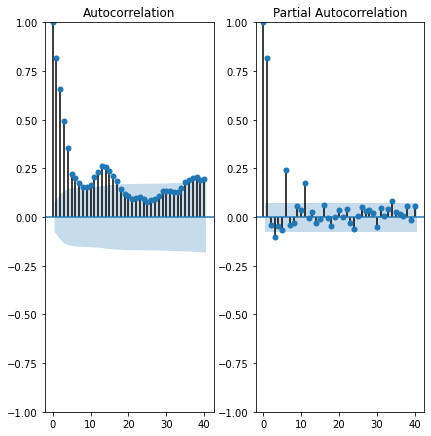

In [12]:
# ACF amd PACF plots

fig, ax = plt.subplots(1,2, figsize=(6,6))
fig.tight_layout()
sm.graphics.tsa.plot_acf(vol.dropna(),lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(vol.dropna(),lags=40, ax=ax[1])
plt.show()

## ARCH Package for Modeling Volatility

#### Autoregressive conditional heteroskedasticity

"The ARCH model is appropriate when the error variance in a time series follows an autoregressive (AR) model; if an autoregressive moving average (ARMA) model is assumed for the error variance, the model is a generalized autoregressive conditional heteroskedasticity (GARCH) model.

ARCH models are commonly employed in modeling financial time series that exhibit time-varying volatility and volatility clustering, i.e. periods of swings interspersed with periods of relative calm."





### GARCH With a constant Mean
The default set of options produces a model with a constant mean, GARCH(1,1) conditional variance and normal errors.

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1374.542486758325
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11
<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1374.54
Distribution:                  Normal   AIC:                           2757.08
Method:            Maximum Likelihood   BIC:                           2775.24
                                        No. Observations:                  692
Date:                Wed, Jan 31 2024   Df Residuals:                      691
Time:                        16:48:39   Df Model:                            1
                               Mean Mod

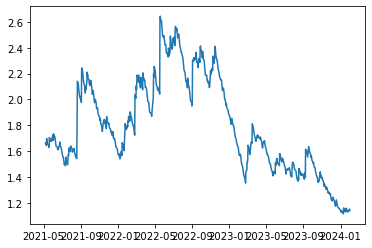

In [40]:
am = arch_model(returns*100)

res = am.fit(update_freq=0)
print(res.summary)

plt.plot(res.conditional_volatility)
plt.show()


### GJR-GARCH

includes one lag of an asymmetric shock which transforms a GARCH model into a GJR-GARCH model

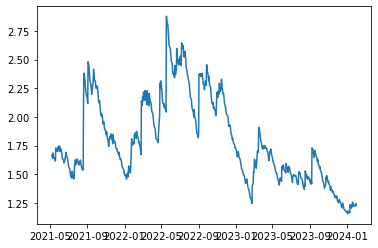

In [42]:
am = arch_model(returns*100, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")


plt.plot(res.conditional_volatility)
plt.show()



### TARCH/ZARCH

TARCH (also known as ZARCH) model the volatility using absolute values. 

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1509.4813094337856
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1374.3809697380498
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1374.3800210715258
            Iterations: 14
            Function evaluations: 100
            Gradient evaluations: 14


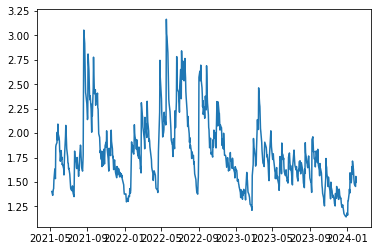

In [44]:
am = arch_model(returns*100, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)


plt.plot(res.conditional_volatility)
plt.show()



### Using Students t-distribution on TARCH/ZARCH

Financial returns are often heavy tailed, and a Student’s T distribution is a simple method to capture this feature. 

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1354.2817240963905
Iteration:     10,   Func. Count:     88,   Neg. LLF: 1352.6683911294892
Iteration:     15,   Func. Count:    123,   Neg. LLF: 1352.6562220614599
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1352.6562220614599
            Iterations: 15
            Function evaluations: 123
            Gradient evaluations: 15


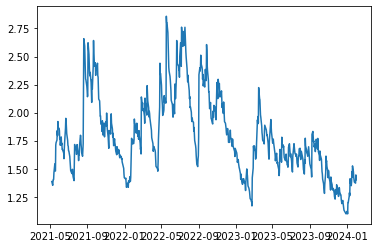

In [46]:
am = arch_model(returns*100, p=1, o=1, q=1, power=1.0, dist="StudentsT")
res = am.fit(update_freq=5)

plt.plot(res.conditional_volatility)
plt.show()

